In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "ARAI"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/baseline

Average verified rate: 0.9345928081685

Average of error rates: 0.07307291666666667

Total token count: 60819



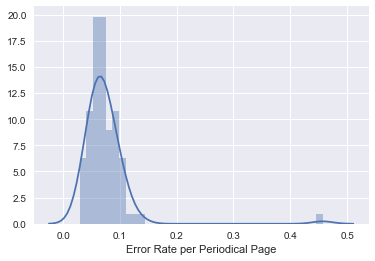

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 10 )

[('ñ', 179),
 ('-', 116),
 ('w', 80),
 ('e', 62),
 ('d', 53),
 ('con-', 51),
 ('n', 51),
 ('re-', 49),
 ('(', 46),
 (')', 45),
 ('g', 39),
 ('r', 35),
 ('f', 34),
 ('tion', 33),
 ('in-', 32),
 ('be-', 29),
 ('m', 29),
 ('mis-', 27),
 ('t', 25),
 ('ex-', 20),
 ('com-', 19),
 ('ers', 18),
 ('de-', 18),
 ('ference', 17),
 ('ence', 16),
 ('pub-', 15),
 ('¥', 15),
 ("'", 14),
 ('mes-', 13),
 ('sev-', 13),
 ('sab-', 12),
 ('ment', 11),
 ('confer-', 11),
 ('tions', 11),
 ('ac-', 11),
 ('lan-', 11),
 ('ad-', 11)]

## Review Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:50]

[('ñ', 179),
 ('(', 46),
 (')', 45),
 ('¥', 15),
 ('years)', 10),
 ('/', 8),
 ('(the', 7),
 ('\\', 5),
 ('times)', 4),
 ('(local)', 4),
 ('*', 3),
 ('(population', 3),
 ('miles)', 3),
 ('(signs', 3),
 ('(not', 2),
 ('(in', 2),
 ('(a', 2),
 ('(conference', 2),
 ('only)', 2),
 ('days)', 2),
 ('(at', 2),
 ('(good', 2),
 ('_', 2),
 (']', 2),
 ('station)', 2),
 ('(illustrated)', 2),
 ('life)', 2),
 ('(general)', 2),
 ('¥we', 2),
 ('p¥a', 1),
 ('_aug', 1),
 ('(now', 1),
 ('dollars)', 1),
 ('jefferson____july', 1),
 ('company)', 1),
 ('hô', 1),
 ('¥some', 1),
 ('(including', 1),
 ('protestant)', 1),
 ('publications_', 1),
 ('(see', 1),
 ('ha_', 1),
 ('¥the', 1),
 ('¥to', 1),
 ('(gospel', 1),
 ('hongkong)', 1),
 ('poles)', 1),
 ('[as', 1),
 ('(honan', 1),
 ('grain)', 1)]

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/correction1

Average verified rate: 0.9423321601480527

Average of error rates: 0.06458333333333334

Total token count: 60519



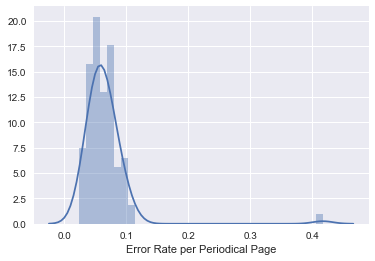

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 116),
 ('w', 81),
 ('e', 62),
 ('d', 53),
 ('con-', 51),
 ('n', 51),
 ('re-', 49),
 ('g', 39),
 ('r', 36),
 ('f', 34),
 ('tion', 34),
 ('in-', 32),
 ('be-', 29),
 ('m', 29),
 ('mis-', 27),
 ('t', 26),
 ('ex-', 20),
 ('com-', 19),
 ('ers', 18),
 ('de-', 18),
 ('ference', 17),
 ('ence', 16),
 ('pub-', 15),
 ("'", 14),
 ('mes-', 13),
 ('sev-', 13),
 ('sab-', 12),
 ('ment', 11),
 ('confer-', 11),
 ('tions', 11),
 ('ac-', 11),
 ('lan-', 11),
 ('ad-', 11)]

## Correction 2 -- Correct line endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/correction2

Average verified rate: 0.9768275768749366

Average of error rates: 0.029375000000000002

Total token count: 59122



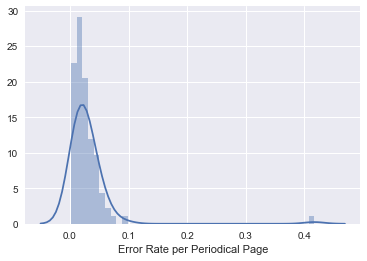

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 115),
 ('w', 81),
 ('e', 60),
 ('d', 53),
 ('n', 51),
 ('g', 39),
 ('r', 36),
 ('f', 34),
 ('m', 29),
 ('t', 26),
 ("'", 14)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/correction3

Average verified rate: 0.9799668369936719

Average of error rates: 0.026000000000000006

Total token count: 59102



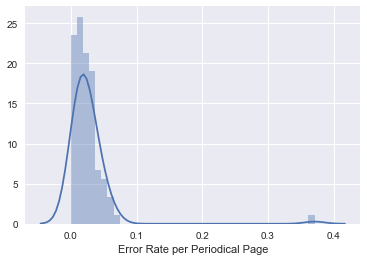

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 81),
 ('e', 60),
 ('d', 53),
 ('n', 51),
 ('g', 39),
 ('r', 36),
 ('f', 34),
 ('m', 29),
 ('t', 26),
 ("'", 14)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/correction4

Average verified rate: 0.9803390748198031

Average of error rates: 0.025541666666666667

Total token count: 59102



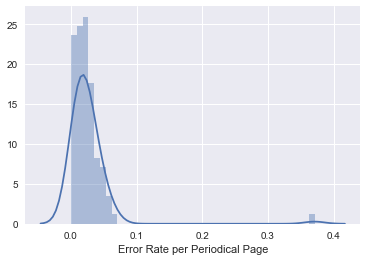

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 81),
 ('e', 60),
 ('d', 53),
 ('n', 51),
 ('g', 39),
 ('r', 36),
 ('f', 34),
 ('m', 29),
 ('t', 26),
 ("'", 14)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/correction5

Average verified rate: 0.9803397401191121

Average of error rates: 0.025541666666666667

Total token count: 59104



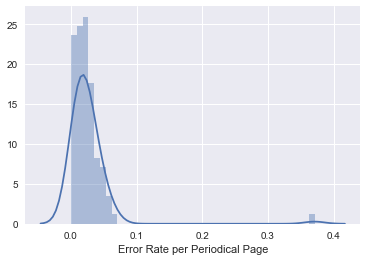

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 81),
 ('e', 60),
 ('d', 53),
 ('n', 51),
 ('g', 39),
 ('r', 36),
 ('f', 34),
 ('m', 29),
 ('t', 26),
 ("'", 14)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/correction6

Average verified rate: 0.980455860703589

Average of error rates: 0.025458333333333333

Total token count: 59097



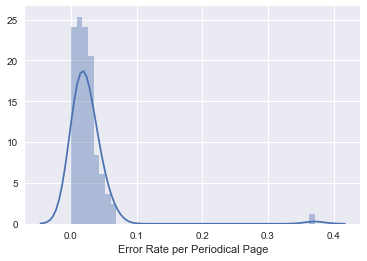

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 81),
 ('e', 60),
 ('d', 53),
 ('n', 51),
 ('g', 39),
 ('r', 36),
 ('f', 34),
 ('m', 29),
 ('t', 26),
 ("'", 14)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ARAI/correction7

Average verified rate: 0.9805720088001354

Average of error rates: 0.025322916666666667

Total token count: 59090



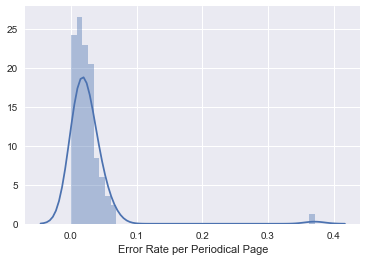

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('w', 81),
 ('e', 60),
 ('d', 53),
 ('n', 51),
 ('g', 39),
 ('r', 36),
 ('f', 34),
 ('m', 29),
 ('t', 26),
 ("'", 14)]

## Review Remaining Errors

In [34]:
GoH.reports.docs_with_high_error_rate(summary)

[('ARAI19190731-V96-31-page1.txt', 0.371)]

In [35]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['colporteur-evangelists',
  'boarding-schools',
  'kavirondo-english',
  'marathi-speaking',
  'catharina-parana',
  'publishing-houses',
  'english-kavirondo'],
 15)